## Plan path from point A to point B in configuration space

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib notebook

In [16]:
conf_space = np.load('conf_space.npy')

In [275]:
# My implementation
class A_star:

    def __init__(self, data):
        self.data = data
        self.n_x, self.n_y, self.n_a = data.shape
        
    def search(self, A, B):
        """Finds path from point A to point B in 3D configuration space (x,y,a) using A-star algorithm.
        A, B - tuples of 3 values."""
        path = []
        self.f = np.full((self.n_x, self.n_y, self.n_a), np.inf)
        self.g = np.full((self.n_x, self.n_y, self.n_a), np.inf)
        parent_x = np.zeros((self.n_x, self.n_y, self.n_a), dtype=int)
        parent_y = np.zeros((self.n_x, self.n_y, self.n_a), dtype=int)
        parent_a = np.zeros((self.n_x, self.n_y, self.n_a), dtype=int)
        self.g[A] = 0
        self.f[A] = self.H(A, B)
        l = [A]
        while len(l) != 0:
            current = self.get_smallest_f(l)
            l.remove(current)
            if current == B:
                return self.path(A, B, parent_x, parent_y, parent_a)
            for n in self.neighbors(current):
                if self.g[n] > self.g[current] + 1:
                    self.g[n] = self.g[current] + 1
                    self.f[n] = self.g[n] + self.H(n, B)
                    parent_x[n], parent_y[n], parent_a[n] = current
                    if not n in l:
                        l.append(n)
            
    def H(self, P, B):
        return abs(P[0] - B[0]) + abs(P[1] - B[1]) + min(abs(P[2] - B[2]), 360 - abs(P[2] - B[2]))
            
    def get_smallest_f(self, l):
        smallest = l[0]
        for m in l:
            if self.f[m] < self.f[smallest]:
                smallest = m
        return smallest
    
    def neighbors(self, P):
        if P[2] == 0:
            p2m = self.n_a - 1
        else:
            p2m = P[2] - 1
        
        if P[2] == self.n_a - 1:
            p2p = 0
        else:
            p2p = P[2] + 1
        
        n = [(P[0]-1,P[1]-1,P[2]), (P[0]-1,P[1],P[2]), (P[0]-1,P[1]+1,P[2]),
             (P[0],P[1]+1,P[2]), (P[0]+1,P[1]+1,P[2]), (P[0]+1,P[1],P[2]),
             (P[0]+1,P[1]-1,P[2]), (P[0],P[1]-1,P[2]),
             
             (P[0]-1,P[1]-1,p2m), (P[0]-1,P[1],p2m), (P[0]-1,P[1]+1,p2m),
             (P[0],P[1]-1,p2m), (P[0],P[1],p2m), (P[0],P[1]+1,p2m),
             (P[0]+1,P[1]-1,p2m), (P[0]+1,P[1],p2m), (P[0]+1,P[1]+1,p2m),
             
             (P[0]-1,P[1]-1,p2p), (P[0]-1,P[1],p2p), (P[0]-1,P[1]+1,p2p),
             (P[0],P[1]-1,p2p), (P[0],P[1],p2p), (P[0],P[1]+1,p2p),
             (P[0]+1,P[1]-1,p2p), (P[0]+1,P[1],p2p), (P[0]+1,P[1]+1,p2p),]
        
        return [i for i in n if i[0] >= 0 and i[0] < self.n_x and i[1] >= 0 and i[1] < self.n_y and self.data[i] == 0]
    
    def path(self, A, B, parent_x, parent_y, parent_a):
        P = B
        path = [P]
        while P != A:
            P = (parent_x[P], parent_y[P], parent_a[P])
            path.append(P)
        return path

In [276]:
conf_space = np.load('conf_space.npy')

In [277]:
alg = A_star(conf_space)

In [278]:
path = alg.search((20,20,0), (40,40,30))
path

[(40, 40, 30),
 (39, 40, 30),
 (38, 40, 30),
 (37, 40, 30),
 (36, 40, 30),
 (35, 40, 30),
 (34, 40, 30),
 (33, 40, 30),
 (32, 40, 30),
 (31, 40, 30),
 (30, 39, 30),
 (29, 38, 30),
 (28, 37, 30),
 (27, 36, 30),
 (26, 35, 30),
 (25, 34, 30),
 (24, 33, 29),
 (24, 32, 28),
 (24, 31, 28),
 (24, 30, 28),
 (23, 29, 29),
 (23, 28, 29),
 (22, 27, 30),
 (23, 26, 30),
 (22, 25, 31),
 (21, 24, 32),
 (20, 23, 33),
 (20, 22, 34),
 (20, 21, 35),
 (20, 20, 0)]

### Visualize

In [239]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook 

In [251]:
x = np.array(path)[:,0] * 25
y = np.array(path)[:,1] * 25
z = np.array(path)[:,2] * 10

<IPython.core.display.Javascript object>


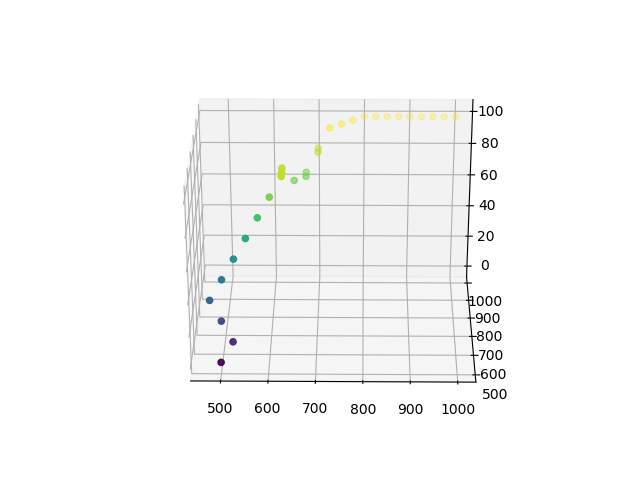

In [247]:
# PLOT 3D points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z', c= z)
#plt.savefig("demo.png")
plt.show()

### Smoothing

In [271]:
import scipy.interpolate as si

def bspline_planning(x, y, a, sn):
    N = 3  # B Spline order
    t = range(len(x))
    x_tup = si.splrep(t, x, k=N)
    y_tup = si.splrep(t, y, k=N)
    a_tup = si.splrep(t, a, k=N)

    x_list = list(x_tup)
    xl = x.tolist()
    x_list[1] = xl + [0.0, 0.0, 0.0, 0.0]

    y_list = list(y_tup)
    yl = y.tolist()
    y_list[1] = yl + [0.0, 0.0, 0.0, 0.0]
    
    a_list = list(a_tup)
    al = a.tolist()
    a_list[1] = al + [0.0, 0.0, 0.0, 0.0]

    ipl_t = np.linspace(0.0, len(x) - 1, sn)
    rx = si.splev(ipl_t, x_list)
    ry = si.splev(ipl_t, y_list)
    ra = si.splev(ipl_t, a_list)
    
    return rx, ry, ra

In [272]:
rx,ry,rz = bspline_planning(x, y, z, len(x) * 10)

<IPython.core.display.Javascript object>


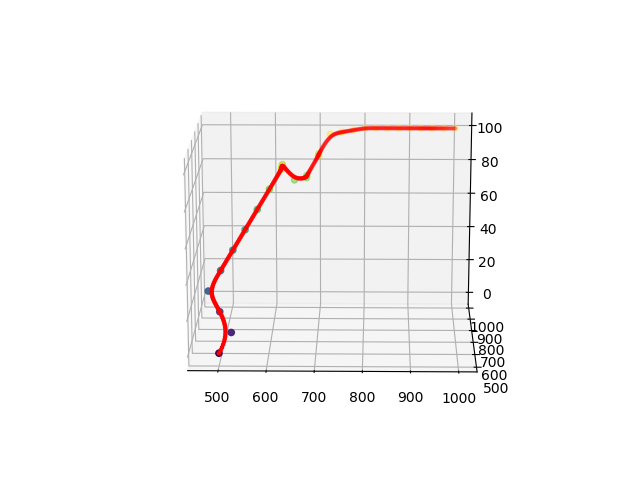

In [273]:
# PLOT 3D points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z', c= z)
ax.scatter(rx, ry, rz, zdir='z', c= 'r', marker='.')
#plt.savefig("demo.png")
plt.show()